___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Import  libraries & data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, ConfusionMatrixDisplay,\
RocCurveDisplay, roc_auc_score,roc_curve
from sklearn.utils.class_weight import compute_class_weight
! pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
! pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
! pip install optuna
from tensorflow.keras.models import load_model

import pickle
import warnings
import os
import optuna

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
sns.set_style('whitegrid')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00


In [8]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## Exploratory Data Analysis and Visualization

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.shape

(10000, 14)

In [11]:
df.isnull().sum().any()

False

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [14]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


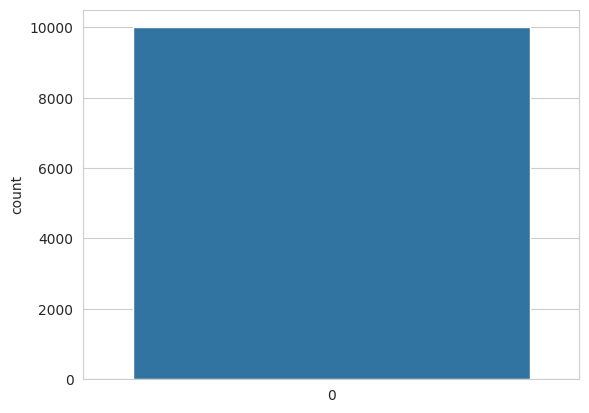

In [15]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"]);

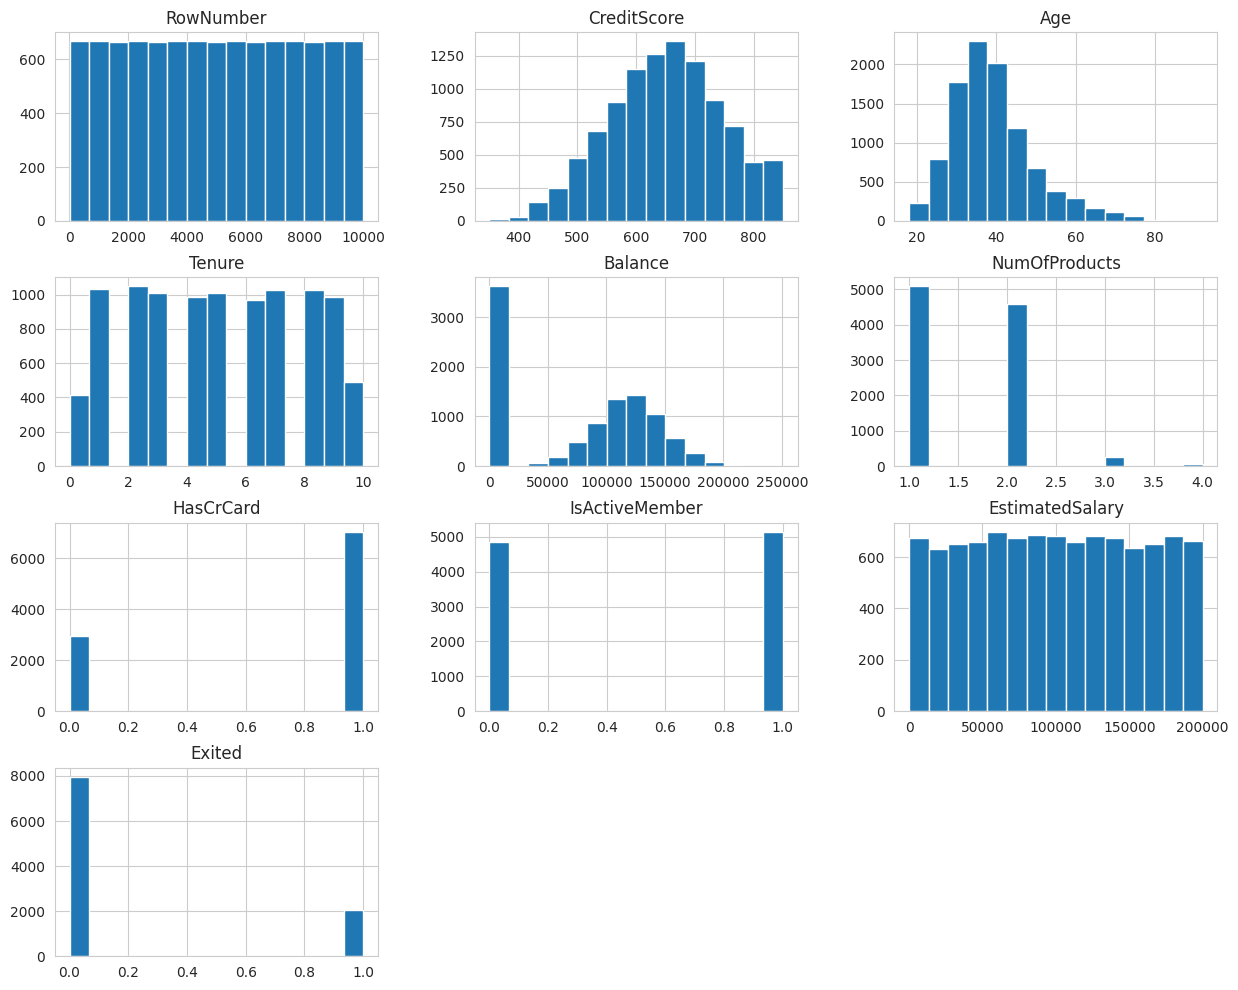

In [16]:
df.hist(figsize=(15, 12), bins=15);


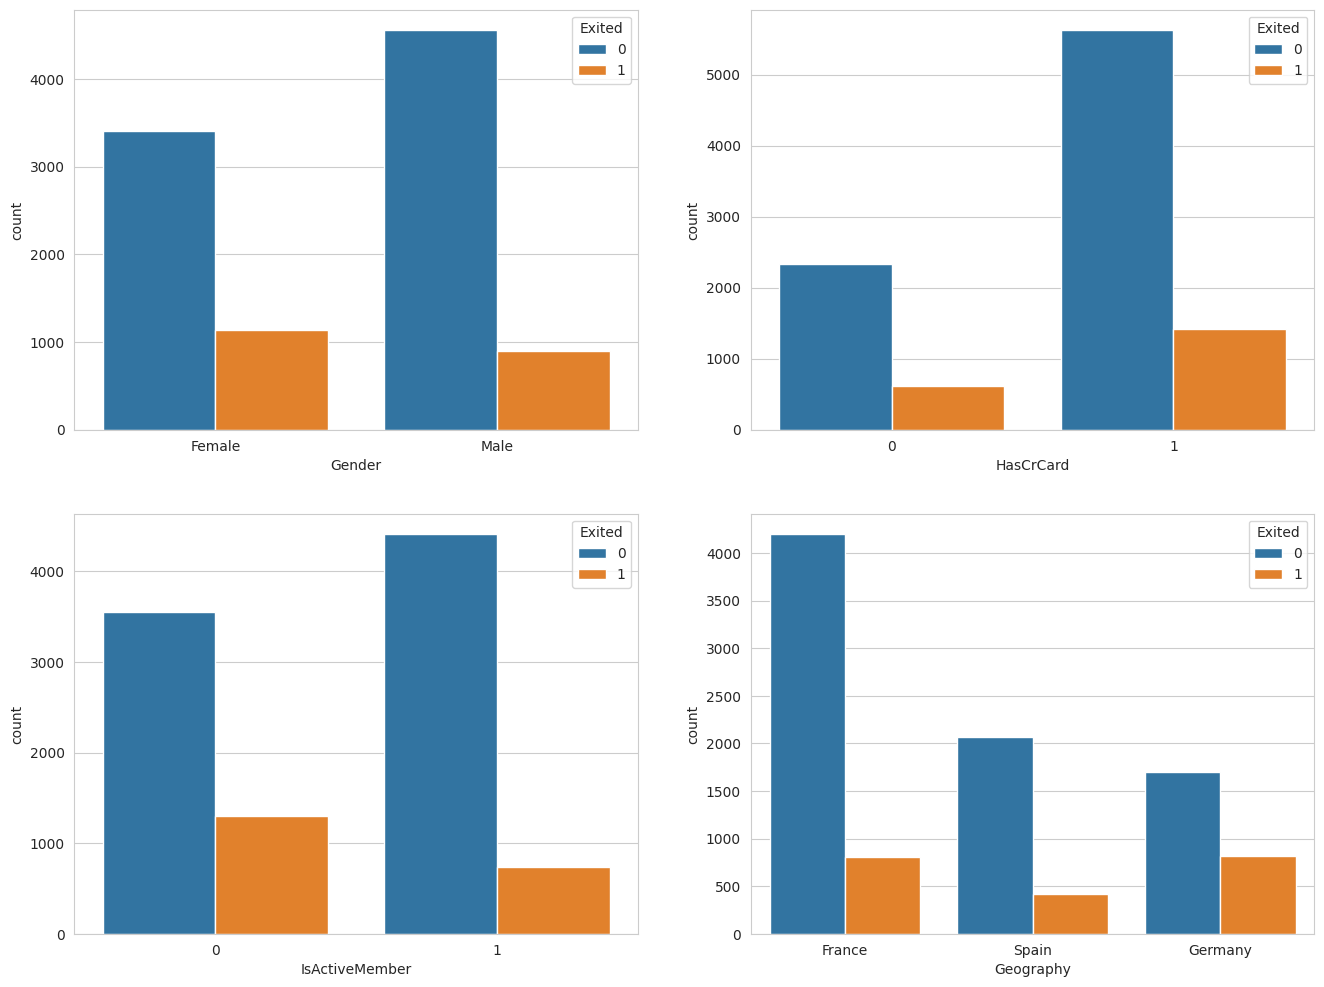

In [17]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

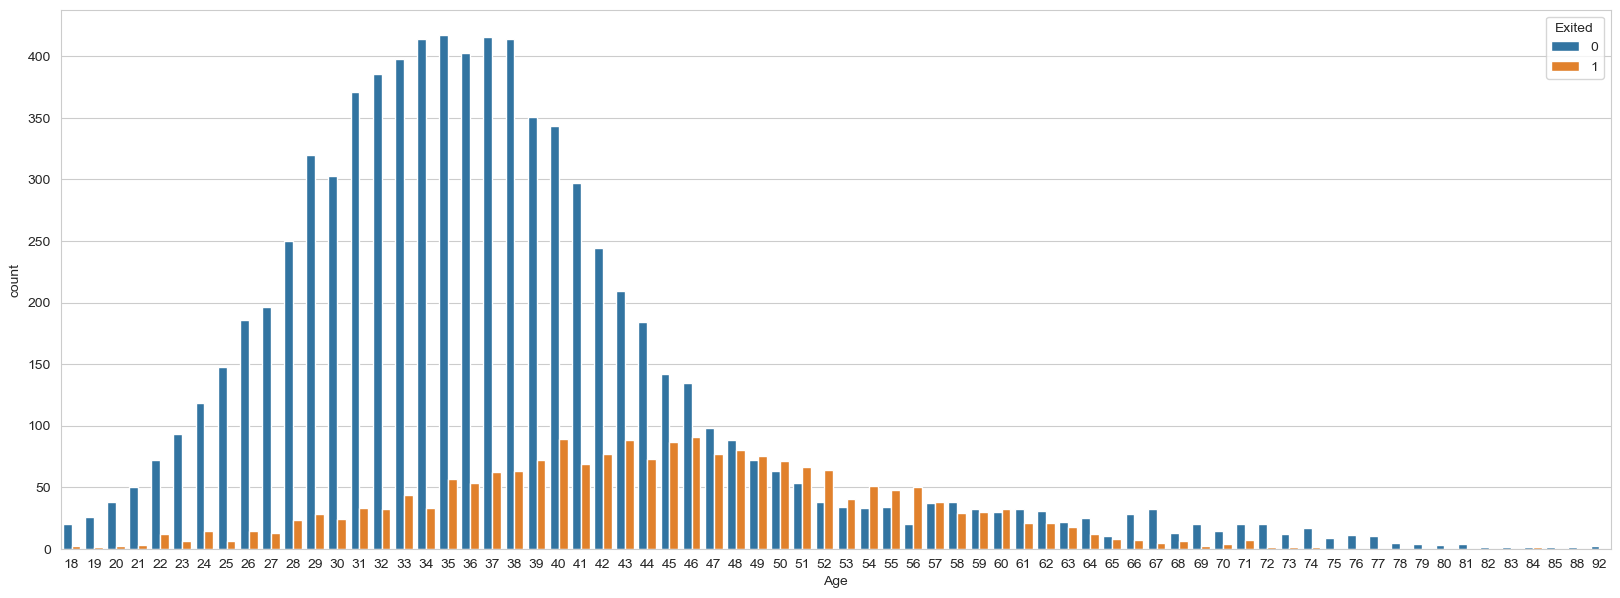

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Age', hue='Exited', data=df)
plt.show()

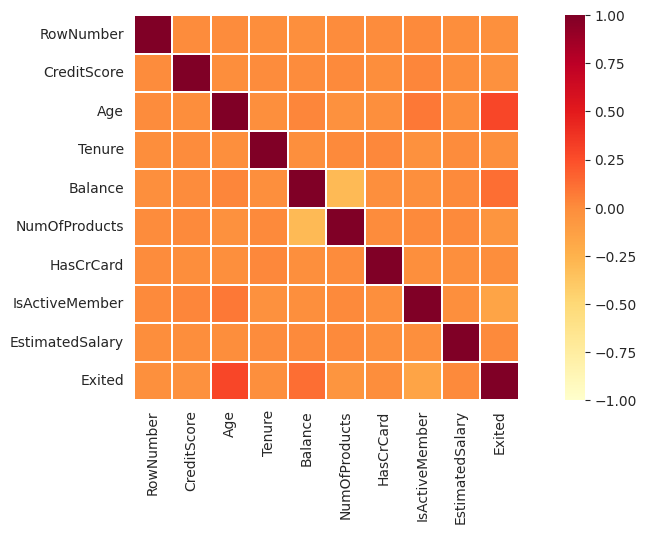

In [18]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(numeric_only=True),
            vmin=-1,
            vmax= 1,
            cmap= 'YlOrRd',
            linewidths=.12,
            linecolor='white',
            fmt='.2g',
            square=True);

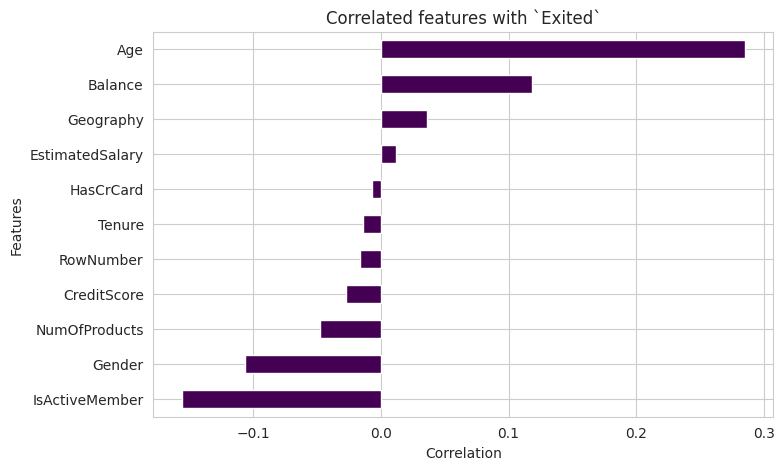

In [19]:

# Encode categorical variables to numeric values
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Calculate correlations with 'Exited' after converting categorical variables to numeric
correlation_data = df.corr()['Exited'][:-1].sort_values()

plt.figure(figsize=(8, 5))
correlation_data.plot(kind='barh', colormap='viridis')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlated features with `Exited`')
plt.show()


In [20]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing of Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)


In [23]:
scaler = MinMaxScaler()


In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### without class_weigth

In [25]:
X_train.shape

(9000, 11)

In [26]:
from tensorflow.keras.optimizers import Adam
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [28]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [29]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 2s 7ms/step - loss: 0.5064 - recall: 0.0000e+00 - val_loss: 0.4884 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4910 - recall: 0.0000e+00 - val_loss: 0.4715 - val_recall: 0.0055
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4800 - recall: 0.0012 - val_loss: 0.4589 - val_recall: 0.0055
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4717 - recall: 0.0182 - val_loss: 0.4493 - val_recall: 0.0221
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4628 - recall: 0.0557 - val_loss: 0.4368 - val_recall: 0.1326
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4533 - recall: 0.0944 - val_loss: 0.4273 - val_recall: 0.1326
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4458 - recall: 0.1265 - val_loss: 0.4211 - val_recall: 0.2376
Epoch 8/200
64/64 [==========

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.506448,0.000000,0.488374,0.000000
1,0.491006,0.000000,0.471501,0.005525
2,0.480020,0.001211,0.458854,0.005525
3,0.471741,0.018160,0.449280,0.022099
4,0.462845,0.055690,0.436821,0.132597


<Axes: >

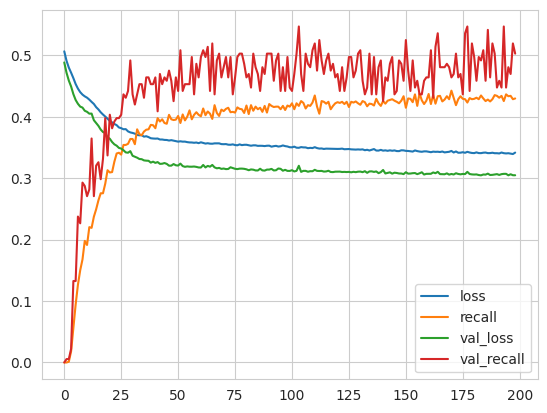

In [32]:
loss_df.plot()

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[765  31]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 2ms/step


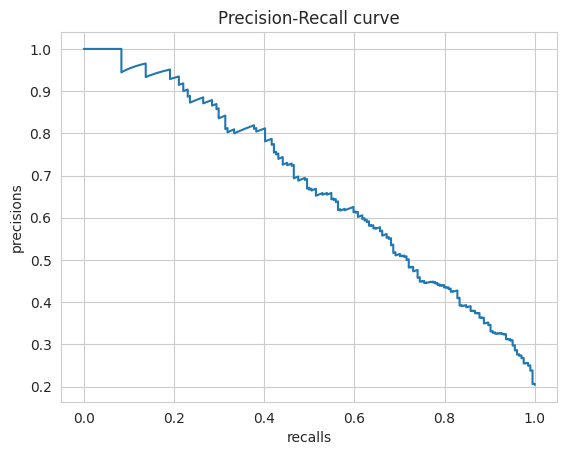

In [34]:
from sklearn.metrics import precision_recall_curve
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [35]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_proba)

0.6741686266855206

### with class_weigth

In [36]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [37]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [38]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.7060 - recall: 0.8257 - val_loss: 0.6742 - val_recall: 0.5691
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6758 - recall: 0.5890 - val_loss: 0.6515 - val_recall: 0.6685
Epoch 3/200
64/64 [==============================] - 0s 4ms/step - loss: 0.6557 - recall: 0.6265 - val_loss: 0.6095 - val_recall: 0.6630
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6308 - recall: 0.6416 - val_loss: 0.5765 - val_recall: 0.6464
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6140 - recall: 0.6640 - val_loss: 0.6163 - val_recall: 0.7293
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6015 - recall: 0.6834 - val_loss: 0.5469 - val_recall: 0.6519
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5944 - recall: 0.6852 - val_loss: 0.5760 - val_recall: 0.7459
Epoch 8/200
64/64 [======================

<Axes: >

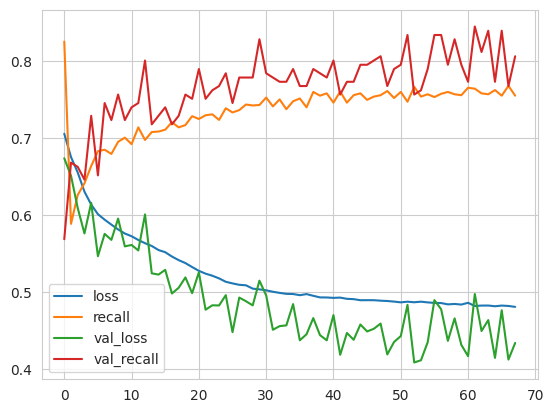

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[616 180]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.74      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.78      1000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 2ms/step


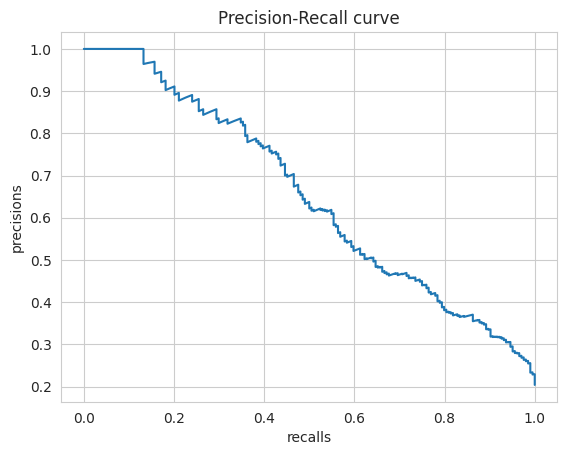

In [43]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


In [44]:
average_precision_score(y_test, y_pred_proba)   #0.692983743350624

0.6519616033489704

In [45]:
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [46]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [47]:
from sklearn.model_selection import GridSearchCV

tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0)
#grid_model.fit(X_train,y_train, class_weight=class_weights)

In [48]:
# Create a custom wrapper class
class CustomKerasClassifier(KerasClassifier):
    def __init__(self, build_fn=None, learn_rate=0.001, **kwargs):
        self.learn_rate = learn_rate
        super(CustomKerasClassifier, self).__init__(build_fn=build_fn, **kwargs)

    def build_fn(self):
        return build_classifier(learn_rate=self.learn_rate)

# Create a CustomKerasClassifier instance
classifier = CustomKerasClassifier(epochs=200, batch_size=128)

# Define the parameters grid for grid search
parameters = {
    'learn_rate': [0.001, 0.003, 0.005],
    'batch_size': [128, 256]
}

In [49]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [50]:


classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=0)

In [52]:
# grid_model.fit(X_train, y_train, class_weight=class_weights)

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

In [ ]:
#y_pred_proba = grid_model.predict(X_test)
#precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
#plt.plot(recalls, precisions, label='ANN')
#plt.xlabel('recalls')
#plt.ylabel('precisions')
#plt.title('Precision-Recall curve')
#plt.show()

In [53]:
average_precision_score(y_test, y_pred_proba)

0.6519616033489704

## Final Model and Model Deployment

In [54]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
36/36 [==============================] - 1s 10ms/step - loss: 0.6978 - recall: 0.5041 - val_loss: 0.6894 - val_recall: 0.6078
Epoch 2/200
36/36 [==============================] - 0s 5ms/step - loss: 0.6556 - recall: 0.6558 - val_loss: 0.6811 - val_recall: 0.7059
Epoch 3/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6214 - recall: 0.6841 - val_loss: 0.6370 - val_recall: 0.7157
Epoch 4/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6025 - recall: 0.6967 - val_loss: 0.6285 - val_recall: 0.7353
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5893 - recall: 0.7038 - val_loss: 0.5717 - val_recall: 0.6569
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5815 - recall: 0.6912 - val_loss: 0.6637 - val_recall: 0.8039
Epoch 7/200
36/36 [==============================] - 0s 4ms/step - loss: 0.5752 - recall: 0.7087 - val_loss: 0.5572 - val_recall: 0.6667
Epoch 8/200
36/36 [=====================

<Axes: >

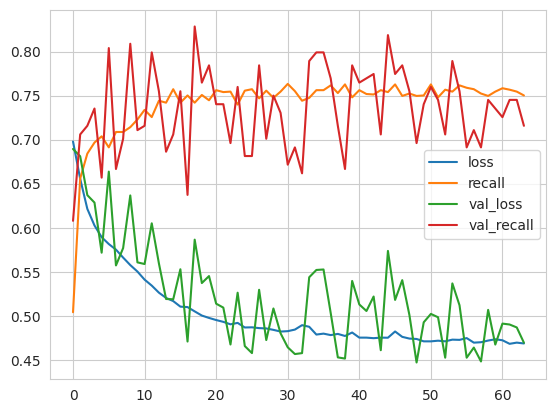

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [57]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4694559574127197
recall :  0.7156862616539001


In [58]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[631 165]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.82      0.78      0.79      1000



In [59]:
model.save('model_churn.h5')

### Prediction

In [60]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

RowNumber               1.00
CreditScore           619.00
Geography               0.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Name: 0, dtype: float64

In [61]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.        , 0.538     , 0.        , 0.        , 0.32432432,
        0.2       , 0.        , 0.        , 1.        , 1.        ,
        0.50673489]])

In [62]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 24ms/step


array([[1]], dtype=int32)

In [63]:
df["Exited"].iloc[0]

1

## Comparison with ML

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[548 248]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       796
           1       0.37      0.72      0.49       204

    accuracy                           0.69      1000
   macro avg       0.64      0.70      0.64      1000
weighted avg       0.80      0.69      0.72      1000



### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[770  26]
 [122  82]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.76      0.40      0.53       204

    accuracy                           0.85      1000
   macro avg       0.81      0.68      0.72      1000
weighted avg       0.84      0.85      0.83      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___